## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

## Loading the dataset

In [2]:
df = pd.read_csv("data.csv")

In [3]:
def check_df(dataframe, head=5):
    print('################# Columns ################# ')
    print(dataframe.columns)
    print('################# Types  ################# ')
    print(dataframe.dtypes)
    print('##################  Head ################# ')
    print(dataframe.head(head))
    print('#################  Shape ################# ')
    print(dataframe.shape)
    print('#################  NA ################# ')
    print(dataframe.isnull().sum())
    print('#################  Quantiles ################# ')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99]).T)


check_df(df)

################# Columns ################# 
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
################# Types  ################# 
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object
##################  Head ################# 
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium 

## Features
We'll use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg

## Data preparation

In [4]:
df.rename(columns={'MSRP' : 'price'},inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
selected_features = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg','price']

df_new = df[selected_features]

df_new.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [6]:
df_new.columns = df_new.columns.str.replace(' ','_').str.lower()

In [7]:
df_new = df_new.fillna(0)

df_new.isnull().sum()

### Question 1
What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [8]:
df_new['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

AUTOMATIC 

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [9]:
numerical_features = df_new.select_dtypes(include=['number'])

In [10]:
numerical_features

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


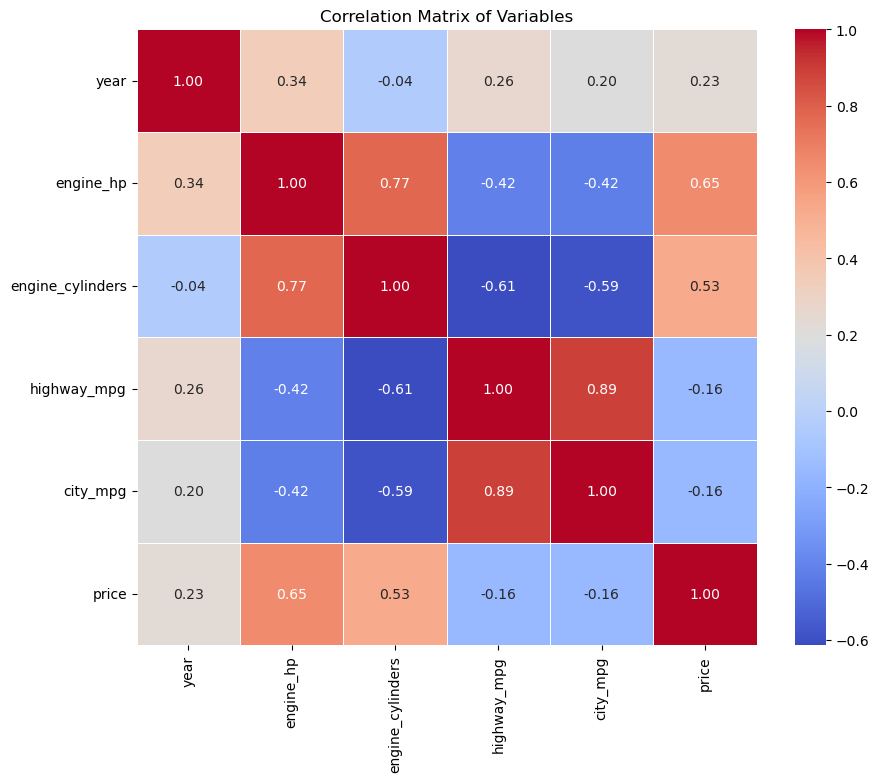

In [11]:
##################    Correlation Analysis    ##################

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()

In [12]:
correlation_matrix.unstack().sort_values(ascending = False)[6:16]

city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
dtype: float64

highway_mpg and city_mpg

## Make price binary
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [13]:
mean_price = df_new['price'].mean()

In [14]:
df_new['above_average'] = df_new['price'].apply(lambda x: 1 if x > mean_price else 0)

In [15]:
df_new.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


## Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (price) is not in your dataframe.

In [16]:
list(df_new.columns)

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [17]:
df_new = df_new.drop(columns="price", axis=1)

In [18]:
df_full_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [19]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0
...,...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,0
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,0
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,0


In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [22]:
del df_train["above_average"] 
del df_val["above_average"]
del df_test["above_average"] 

In [23]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [24]:
df_val

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Volkswagen,Beetle,2015,210.0,4.0,MANUAL,2dr Hatchback,31,23
1,Audi,SQ5,2015,354.0,6.0,AUTOMATIC,4dr SUV,24,17
2,Pontiac,Grand Am,2005,140.0,4.0,AUTOMATIC,Sedan,31,22
3,Nissan,350Z,2009,306.0,6.0,MANUAL,Convertible,24,17
4,Ford,E-150,1996,199.0,6.0,AUTOMATIC,Passenger Van,15,11
...,...,...,...,...,...,...,...,...,...
2378,Ford,Explorer Sport,2003,203.0,6.0,AUTOMATIC,2dr SUV,19,14
2379,Subaru,Outback,2016,175.0,4.0,AUTOMATIC,4dr SUV,33,25
2380,GMC,Sonoma,2003,190.0,6.0,MANUAL,Extended Cab Pickup,17,12
2381,Aston Martin,V8 Vantage,2015,430.0,8.0,AUTOMATED_MANUAL,Coupe,21,14


## Question 3
- Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
cat_cols = ["make", "model", "transmission_type", "vehicle_style"]

In [27]:
num_cols = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

In [28]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [29]:
mi = df_full_train[cat_cols].apply(mutual_info_above_average_score)
mi.sort_values(ascending=False)

model                0.460994
make                 0.238724
vehicle_style        0.083390
transmission_type    0.020884
dtype: float64

transmission_type

## Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
     - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
     - model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

##### One-hot encoding

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat_cols + num_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cat_cols + num_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

##### Logistic Regression

In [31]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [32]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [33]:
y_pred = model.predict_proba(X_val)[:, 1]

above_average_decision = (y_pred >= 0.5)

accuracy = (y_val == above_average_decision).mean()

In [34]:
round(accuracy,2)

0.93

## Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

Note: the difference doesn't have to be positive

In [35]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
min_diff = float('inf')  

for i in features:
    # Dropping the current feature from the training and validation datasets
    df_train_tr = df_train.drop(i, axis=1)
    train_tr_dicts = df_train_tr.to_dict(orient='records')
    X_train_tr = dv.transform(train_tr_dicts)

    df_val_tr = df_val.drop(i, axis=1)
    val_tr_dicts = df_val_tr.to_dict(orient='records')
    X_val_tr = dv.transform(val_tr_dicts)

    # Training the model without the current feature
    model.fit(X_train_tr, y_train)

    # Making predictions on the validation set
    y_pred_tr = model.predict_proba(X_val_tr)[:, 1]
    accuracion_tr = (y_pred_tr >= 0.5)
    tr_accuracy = (y_val == accuracion_tr).mean()

    # Calculating the difference 
    diff = accuracy - tr_accuracy
    print(f'Difference without {i}: {diff}')

    # Checking if the current difference is the smallest
    if abs(diff) < abs(min_diff):
        min_diff = diff
        smallest_diff_feature = i

print(f'\nThe feature with the smallest difference is: {smallest_diff_feature}')


Difference without year: -0.014267729752412972
Difference without engine_hp: 0.011330255979857262
Difference without transmission_type: -0.011749895090222395
Difference without city_mpg: -0.012169534200587528

The feature with the smallest difference is: engine_hp


## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

Note: If there are multiple options, select the smallest alpha.

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [52]:
df_v2 = df_new.copy(deep=True)

In [53]:
df_v2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [54]:
df_v2['price'] = df['price']

In [55]:
df_v2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0,34500


In [56]:
df_v2.drop('above_average', axis=1, inplace=True)

In [57]:
df_v2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [58]:
df_v2.price = np.log1p(df_v2.price)

In [59]:
df_v2.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744


In [60]:
# Divide de dataset in train, val, and test

df_train_full_v2, df_test_v2 = train_test_split(df_v2, test_size=0.2, random_state=42)
df_train_v2, df_val_v2 = train_test_split(df_train_full_v2, test_size=0.25, random_state=42)

# Reset index
df_train_v2 = df_train_v2.reset_index(drop=True)
df_val_v2 = df_val_v2.reset_index(drop=True)
df_test_v2 = df_test_v2.reset_index(drop=True)

In [61]:
X_train_v2 = df_train_v2.iloc[:, :-1]
X_val_v2 = df_val_v2.iloc[:, :-1]
X_test_v2 = df_test.iloc[:, :-1]

y_train_v2 = df_train_v2.price
y_val_v2 = df_val_v2.price
y_test_v2 = df_test_v2.price

In [62]:
# Preparing the dataset

train_dict_v2 = df_train_v2.to_dict(orient='records')

In [63]:
dv_v2 = DictVectorizer(sparse=False)
dv_v2.fit(train_dict_v2)

X_train_v2 = dv.transform(train_dict_v2)

val_dict_v2 = df_val_v2.to_dict(orient='records')
X_val_v2 = dv.transform(val_dict_v2)

In [64]:
alpha_list = [0, 0.01, 0.1, 1, 10]

In [65]:
# Ridge regression

for a in alpha_list:
    ridge_model =  Ridge(alpha=a, solver="sag", random_state=42)

    ridge_model.fit(X_train_v2, y_train_v2)
    ridge_pred = ridge_model.predict(X_val_v2)

    score = np.sqrt(mean_squared_error(y_val_v2, ridge_pred))

    print(f'Alpha -> {a} and Score -> {np.round(score, 3)}')

C:\Anaconda\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0 and Score -> 0.487


C:\Anaconda\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0.01 and Score -> 0.487


C:\Anaconda\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 0.1 and Score -> 0.487


C:\Anaconda\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Alpha -> 1 and Score -> 0.487
Alpha -> 10 and Score -> 0.487


C:\Anaconda\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
